In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# 1️ Load dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# 2.EDA 
df.shape

(768, 9)

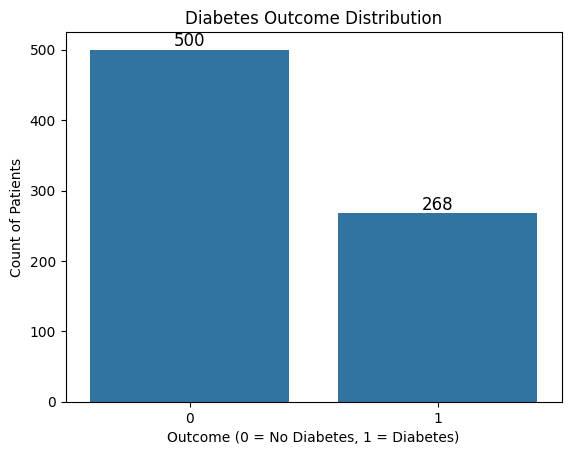

In [8]:
outcome_counts = df["Outcome"].value_counts()

sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count of Patients")

# Add labels on bars
for i, v in enumerate(outcome_counts):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.show()

In [9]:
pd.DataFrame(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
from docx import Document

def dataframe_to_word(df, file_name):
    doc = Document()
    doc.add_heading('Pandas DataFrame Table', level=1)

    # Create a table with the same number of columns as df
    table = doc.add_table(rows=1, cols=len(df.columns))
    table.style = 'Table Grid'

    # Add column headers
    hdr_cells = table.rows[0].cells
    for i, col_name in enumerate(df.columns):
        hdr_cells[i].text = str(col_name)

    # Add DataFrame rows
    for _, row in df.iterrows():
        row_cells = table.add_row().cells
        for i, item in enumerate(row):
            row_cells[i].text = str(item)

    doc.save(file_name)

# Example usage
dataframe_to_word(pd.DataFrame(df.info()), 'pandas_table.docx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
# mean values of the features grouped by the outcome.
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


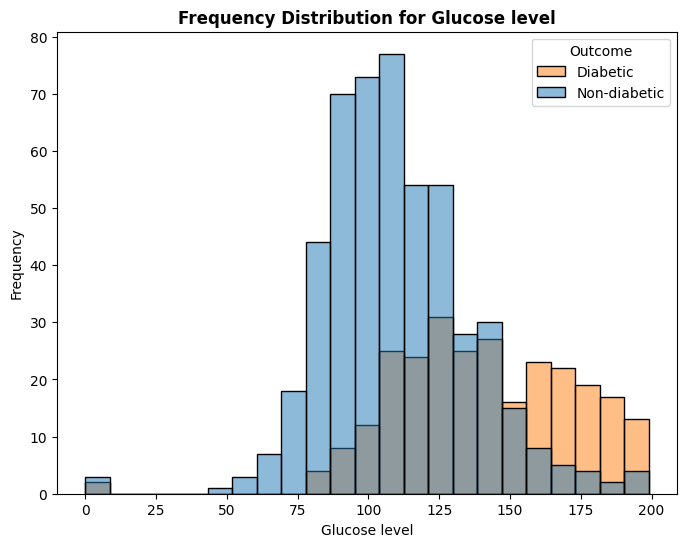

In [13]:

plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="Glucose", hue="Outcome")

plt.title("Frequency Distribution for Glucose level", fontweight="bold")

plt.xlabel("Glucose level")

plt.ylabel("Frequency")

plt.legend(title="Outcome", labels=["Diabetic", "Non-diabetic"])

plt.show()


In [14]:
# 3 Split features & labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [15]:
# Convert numpy arrays back to DataFrame for easy plotting
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)


NameError: name 'X_train' is not defined

In [35]:
# 4 Train-test split
# Splits dataset into 80% training and 20% testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pd.DataFrame(X_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
# 5 Scaling
# Standardizes features to mean = 0, standard deviation = 1.
# Ensures fair contribution of each feature in the model.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
for col in X_train_df .columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.kdeplot(X_train_df [col], ax=axes[0], color="red", fill=True)
    axes[0].set_title(f"{col} — Before Scaling")
    sns.kdeplot(X_train_scaled_df[col], ax=axes[1], color="blue", fill=True)
    axes[1].set_title(f"{col} — After Scaling")
    plt.tight_layout()
    plt.show()

In [54]:
# 6 Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
# 6. Model Testing 

# Predict outcomes for test set
y_pred = model.predict(X_test_scaled)

# Calculate model accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model accuracy on Test Data: {acc * 100:.2f}%")

Model accuracy on Test Data: 75.32%


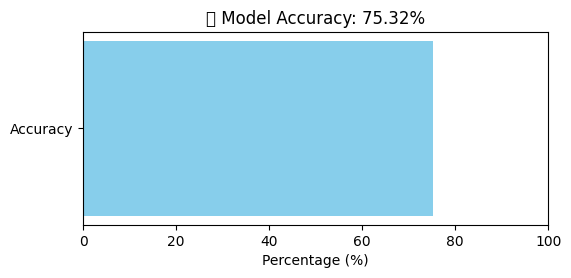

In [ ]:
plt.figure(figsize=(6, 2.5))
plt.barh(["Accuracy"], [acc * 100], color="skyblue")  # Horizontal bar
plt.xlim(0, 100)
plt.title(f"Model Accuracy: {acc * 100:.2f}%")
plt.xlabel("Percentage (%)")
plt.show()

In [11]:
# 7 Evaluate
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

C:\Users\Abhijit\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


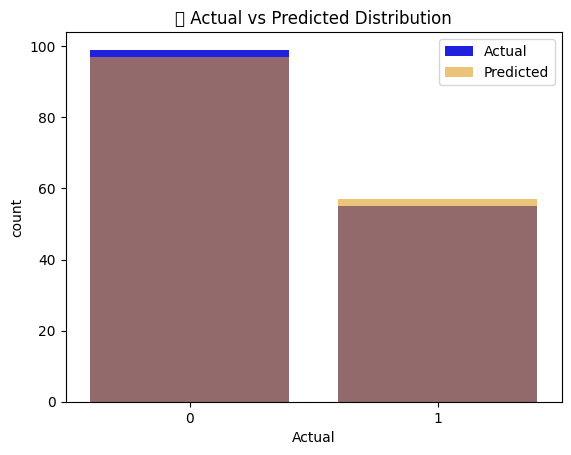

In [ ]:

results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
sns.countplot(x="Actual", data=results, color="blue", label="Actual")
sns.countplot(x="Predicted", data=results, color="orange", alpha=0.6, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Distribution")
plt.show()

In [ ]:
# 8 Save model & scaler
with open("trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)